In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Crop_recommendation.csv")

In [3]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB





The above dataset is used to build predictive model and recommend the most suitable crops.
The dataset above contains the required features to train a predictive model.
The Features are:
N: Nitrogen percentage present in the soil
P: Phosphorus percentage present in the soil
K: potassium percentage present in the soil
Temperature: temperature in degree celcius
Humidity: humidity in %
pH: pH of the soil
rainfall: sale of rainfall in mm




In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no Null values present in the dataset 

Finding the Unique values.

In [7]:
data.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [8]:
data['label'].value_counts()

mothbeans      100
chickpea       100
pigeonpeas     100
kidneybeans    100
banana         100
orange         100
coconut        100
papaya         100
pomegranate    100
watermelon     100
apple          100
blackgram      100
grapes         100
muskmelon      100
mungbean       100
cotton         100
jute           100
coffee         100
mango          100
rice           100
lentil         100
maize          100
Name: label, dtype: int64

DATA ANALYSIS

<AxesSubplot:>

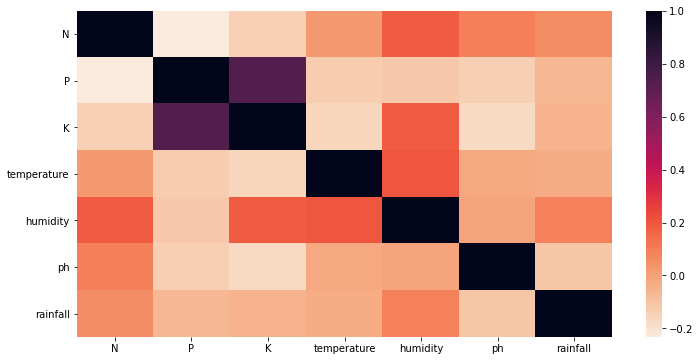

In [9]:
figure,ax=plt.subplots(figsize=(12,6))
corr=data.corr()
sns.heatmap(corr , ax=ax , cmap="rocket_r")

In [10]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

<AxesSubplot:xlabel='P', ylabel='Count'>

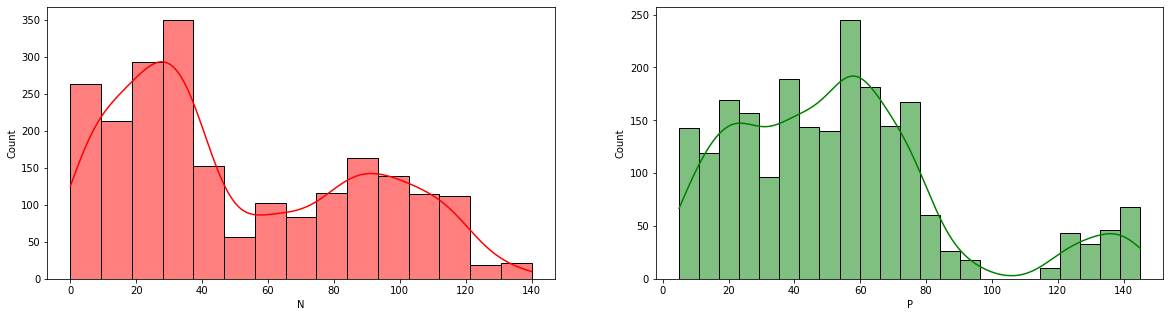

In [11]:
figure= plt.figure(figsize=(20,5))
ax=figure.add_subplot(121)
sns.histplot(data['N'] , color ='red',ax=ax, kde='True')
ax=figure.add_subplot(122)
sns.histplot(data['P'], color='green', ax=ax, kde='True')
#plt.tight_layout()

<AxesSubplot:xlabel='temperature', ylabel='Count'>

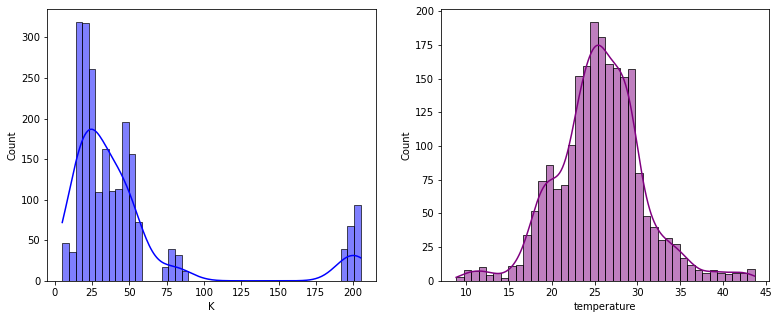

In [12]:
figure=plt.figure(figsize=(20,5))
ax=figure.add_subplot(132)
sns.histplot(data['K'], color='blue', ax=ax, kde='True')
ax=figure.add_subplot(133)
sns.histplot(data['temperature'], color='purple', ax=ax, kde='True')
#plt.tight_layout()

<AxesSubplot:xlabel='ph', ylabel='Count'>

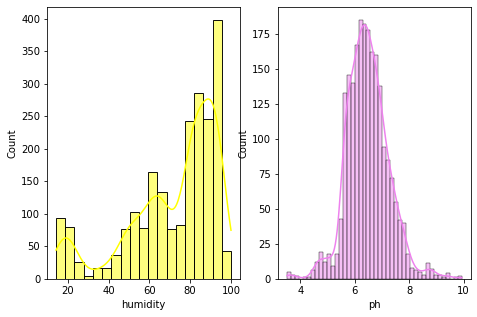

In [13]:
figure=plt.figure(figsize=(20,5))
ax=figure.add_subplot(152)
sns.histplot(data['humidity'], color='yellow', ax=ax, kde='True')
ax=figure.add_subplot(153)
sns.histplot(data['ph'], color='violet', ax=ax, kde='True')
#plt.tight_layout()

<AxesSubplot:xlabel='rainfall', ylabel='Count'>

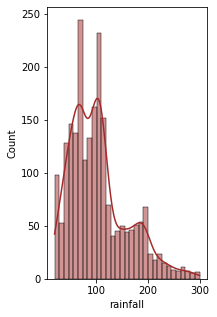

In [14]:
figure=plt.figure(figsize=(20,5))
ax=figure.add_subplot(161)
sns.histplot(data['rainfall'], color='brown', ax=ax, kde='True')
#plt.tight_layout()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


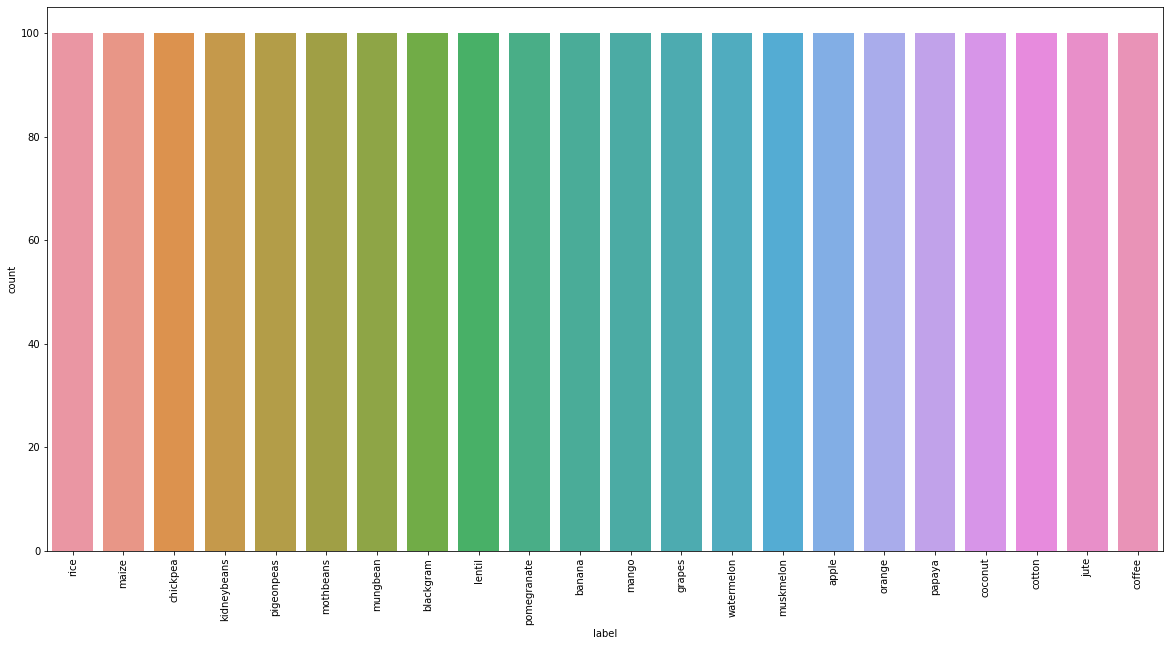

In [15]:
figure=plt.figure(figsize=(20,10))
sns.countplot(data['label'])
plt.xticks(rotation=90)
plt.show()

REMOVING OR SEPARATING THE FEATURES FROM THE TARGET LABEL

In [16]:
x=data.drop('label',axis=1)
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


TO ENCODE VALUES OF THE TARGET LABEL

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
la=LabelEncoder()

In [19]:
data['label']=la.fit_transform(data['label'])
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [20]:
data['label'].value_counts()

0     100
2     100
19    100
17    100
15    100
13    100
11    100
9     100
7     100
5     100
3     100
1     100
20    100
18    100
16    100
14    100
12    100
10    100
8     100
6     100
4     100
21    100
Name: label, dtype: int64

In [21]:
data.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [22]:
y=data['label']
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

In [23]:
model=[]
accuracy=[]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=40)

USING DECISION TREE

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt=DecisionTreeClassifier()

In [28]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
predict_x = dt.predict(x_test)

In [31]:
predict_x

array([ 2, 17,  5,  7, 12,  9, 19, 16, 11, 14, 16,  5,  4,  1, 18, 16,  6,
       19, 15, 17, 19,  1, 17, 19, 11, 13,  6,  6, 11,  9, 14,  4, 12,  5,
        2,  2,  8,  2, 16, 16,  8, 21, 13,  5,  8, 10, 20,  8, 18,  6,  8,
        0, 17, 15, 14,  7, 12,  3, 12,  7,  9, 18, 20, 17, 14, 17, 16,  7,
        0, 21, 19, 19, 17, 17, 10,  3, 14,  1, 15,  9,  5, 21,  7,  0,  6,
        0,  8,  7, 10, 12,  5,  5,  1, 10,  8,  0, 21, 12,  4, 14, 16, 15,
        3,  3, 21, 18,  5, 15, 18, 15,  9,  0, 17,  5, 12, 16,  4, 20, 17,
        5,  3,  7, 12,  7, 21, 17, 19, 19, 20, 16,  9, 20, 12,  6, 12,  3,
       12,  1, 11, 13,  9, 14, 19,  6, 16,  4,  2, 15,  6,  0,  1,  9, 10,
        9, 14,  1,  8,  6,  3,  9,  6,  1, 19,  9, 10, 20, 21,  6, 15, 21,
        7, 21,  2, 18,  9, 16,  6,  9, 21,  2, 17,  5,  1, 21,  2,  9,  5,
       10,  5,  4, 12,  7,  0,  1, 14, 19, 19,  9,  8,  4,  8, 13, 18,  2,
        1, 15,  9, 10, 19, 16, 10, 17, 20,  2, 18,  7, 11,  6, 20,  0,  8,
       10, 15,  0, 16, 12

In [32]:
dt_accuracy=dt.score(x_test,y_test)

In [33]:
dt_accuracy

0.9863636363636363

In [34]:
accuracy.append(dt_accuracy)

In [35]:
model.append("Decision Tree")

USING LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr=LogisticRegression()

In [40]:
lr.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
predictx=lr.predict(x_test)

In [42]:
predictx

array([ 2, 17,  5,  7, 12,  9, 19, 16, 11, 14, 16,  5,  4,  1, 18, 16,  6,
        4, 15, 17, 19,  1, 17, 19,  6, 13,  6,  6, 11,  9, 14,  4, 12,  5,
        2,  2,  8, 13, 16, 16,  8, 21, 13,  5,  8, 10,  8,  8, 18,  6,  8,
        0, 14, 15, 14,  7, 12,  3, 12,  7,  9, 18, 20, 17, 14, 17, 16,  7,
        0, 21, 19, 19, 17, 17, 10,  3, 14,  1, 15,  9,  5, 21,  7,  0,  6,
        0,  8,  7, 10, 12,  5,  5,  1, 10,  8,  0, 21, 12,  4, 14, 16, 15,
        3,  3, 21, 18,  5, 15, 18, 15,  9,  0, 17,  5, 12, 16,  4, 20, 10,
        5,  3,  7, 12,  7, 21, 17, 19, 19, 20, 16,  9, 20, 12,  6, 12,  3,
       12,  1, 11, 13,  9, 14, 19,  6, 16,  4,  2, 15,  6,  0,  1,  9, 10,
        9, 14,  1,  8,  6,  3,  9,  6,  1, 19,  9, 10, 20, 21,  6, 15, 21,
        7, 21,  2, 18,  9, 16,  6,  9, 21,  2, 17,  5,  1, 21, 10,  9,  5,
       10,  5, 19, 12,  7,  0,  1, 14, 19, 19,  9,  8,  4,  8, 13, 18,  2,
        1, 15,  9, 10, 19, 16, 10, 14, 20,  2, 18,  7, 11,  6, 20,  0,  8,
       10, 15,  0, 16, 12

In [44]:
lr_accuracy=lr.score(x_test,y_test)

In [46]:
lr_accuracy

0.9590909090909091

In [47]:
accuracy.append(lr_accuracy)

In [48]:
model.append("Logistic Regression")

USING RANDOM FOREST

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf=RandomForestClassifier()

In [51]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
predict_X=rf.predict(x_test)

In [54]:
predict_X

array([ 2, 17,  5,  7, 12,  9, 19, 16, 11, 14, 16,  5,  4,  1, 18, 16,  6,
       19, 15, 17, 19,  1, 17, 19, 11, 13,  6,  6, 11,  9, 14,  4, 12,  5,
        2,  2,  8, 13, 16, 16,  8, 21, 13,  5,  8, 10, 20,  8, 18,  6,  8,
        0, 14, 15, 14,  7, 12,  3, 12,  7,  9, 18, 20, 17, 14, 17, 16,  7,
        0, 21, 19, 19, 17, 17, 10,  3, 14,  1, 15,  9,  5, 21,  7,  0,  6,
        0,  8,  7, 10, 12,  5,  5,  1, 10,  8,  0, 21, 12,  4, 14, 16, 15,
        3,  3, 21, 18,  5, 15, 18, 15,  9,  0, 17,  5, 12, 16,  4, 20, 17,
        5,  3,  7, 12,  7, 21, 17, 19, 19, 20, 16,  9, 20, 12,  6, 12,  3,
       12,  1, 11, 13,  9, 14, 19,  6, 16,  4,  2, 15,  6,  0,  1,  9, 10,
        9, 14,  1,  8,  6,  3,  9,  6,  1, 19,  9, 10, 20, 21,  6, 15, 21,
        7, 21,  2, 18,  9, 16,  6,  9, 21,  2, 17,  5,  1, 21,  2,  9,  5,
       10,  5,  4, 12,  7,  0,  1, 14, 19, 19,  9,  8,  4,  8, 13, 18,  2,
        1, 15,  9, 10, 19, 16, 10, 14, 20,  2, 18,  7, 11,  6, 20,  0,  8,
       10, 15,  0, 16, 12

In [55]:
rf_accuracy=rf.score(x_test,y_test)

In [56]:
rf_accuracy

0.9977272727272727

In [57]:
accuracy.append(rf_accuracy)

In [58]:
model.append("Random Forest")

In [59]:
model

['Decision Tree', 'Logistic Regression', 'Random Forest']

In [60]:
accuracy

[0.9863636363636363, 0.9590909090909091, 0.9977272727272727]